# Classification 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from imblearn.over_sampling import SMOTE



In [6]:
dataset = pd.read_csv('heart_disease.csv')

In [7]:
dataset

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


# Pre-processing

## Handling missing values

In [8]:
pd.DataFrame(dataset)
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

numeric_columns = [1, 4, 9, 10, 11, 12, 13, 14]
imputer_numeric = SimpleImputer(strategy='mean')
X[:, numeric_columns] = imputer_numeric.fit_transform(X[:, numeric_columns])


boolean_columns = [3, 5, 7, 8]
imputer_boolean = SimpleImputer(strategy='most_frequent')
X[:, boolean_columns] = imputer_boolean.fit_transform(X[:, boolean_columns])


categorical_columns = [0, 2, 6]
imputer_categorical = SimpleImputer(strategy='most_frequent')
X[:, categorical_columns] = imputer_categorical.fit_transform(X[:, categorical_columns])

print (X)

[['Male' 39.0 'postgraduate' ... 26.97 80.0 77.0]
 ['Female' 46.0 'primaryschool' ... 28.73 95.0 76.0]
 ['Male' 48.0 'uneducated' ... 25.34 75.0 70.0]
 ...
 ['Female' 48.0 'primaryschool' ... 22.0 84.0 86.0]
 ['Female' 44.0 'uneducated' ... 19.16 86.0 81.96675324675324]
 ['Female' 52.0 'primaryschool' ... 21.47 80.0 107.0]]


## Encoding

In [9]:

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'),categorical_columns)],remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(X[0])

[1.0 1.0 0.0 0.0 0.0 39.0 0 0.0 0.0 0 0 195.0 106.0 70.0 26.97 80.0 77.0]


In [10]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 0, 0])

## Count classes

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_8020\1599239590.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('class 0:',target_count[0])
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_8020\1599239590.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('class 1:',target_count[1])
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_8020\1599239590.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('proportion:',round(

class 0: 3594
class 1: 644
proportion: 5.58 :1


<Axes: title={'center': 'Count (target)'}, xlabel='Heart_stroke'>

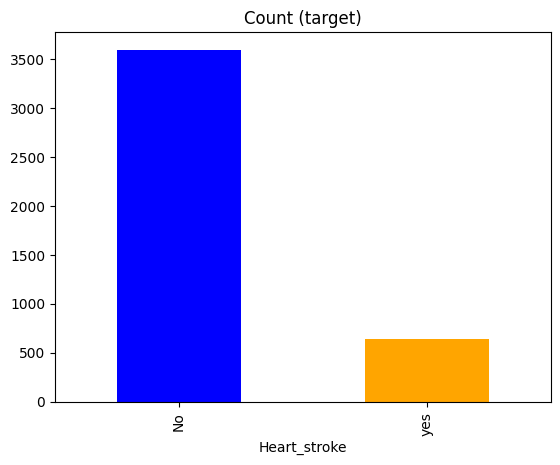

In [11]:

target_count=dataset.Heart_stroke.value_counts()
print('class 0:',target_count[0])
print('class 1:',target_count[1])
print('proportion:',round(target_count[0]/target_count[1],2),':1')
target_count.plot(kind='bar',title ='Count (target)', color=['blue' ,'orange'])


## Splitting data & Oversampling using Smote

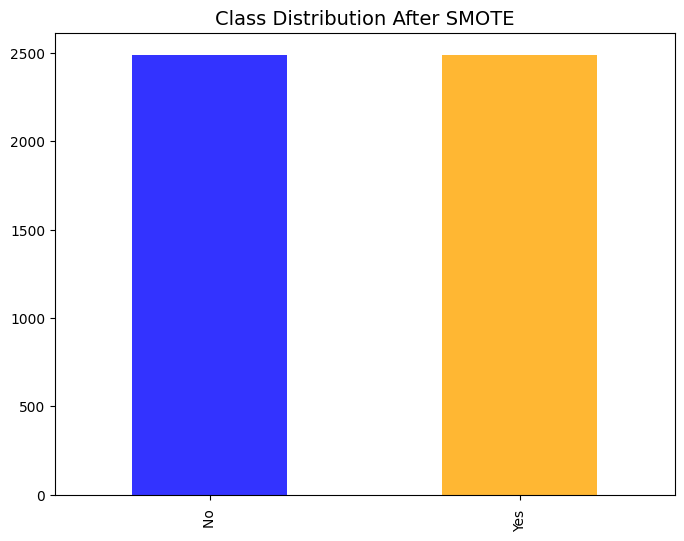

In [12]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
smote = SMOTE(random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

class_distribution = pd.Series(Y_train_res).value_counts()

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['blue', 'orange'], alpha=0.8)
plt.title("Class Distribution After SMOTE", fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No ', 'Yes '])
plt.show()


In [13]:
X_train
X_test

array([[1.0, 0.0, 0.0, ..., 24.27, 75.0, 74.0],
       [0.0, 0.0, 0.0, ..., 23.09, 70.0, 75.0],
       [0.0, 1.0, 0.0, ..., 17.48, 75.0, 57.0],
       ...,
       [1.0, 0.0, 1.0, ..., 21.02, 81.0, 135.0],
       [1.0, 0.0, 0.0, ..., 26.79, 80.0, 93.0],
       [1.0, 0.0, 0.0, ..., 25.71, 88.0, 92.0]], dtype=object)

In [14]:
Y_test
Y_train


array([0, 0, 0, ..., 0, 0, 0])

## Feature Scaling

In [15]:
sc = StandardScaler()
X_train[:, 9:] = sc.fit_transform(X_train[:, 9:])
X_test[:, 9:] = sc.transform(X_test[:, 9:])
print(X_train)
print(X_test)

[[1.0 0.0 0.0 ... 0.10778547101612104 -0.0907131356077551
  -0.5838042053674105]
 [0.0 0.0 1.0 ... 2.363700082919052 -0.8312319251837236
  -0.793261130445868]
 [1.0 0.0 0.0 ... 0.623634654700708 1.143484847018859
  -0.08110758517911243]
 ...
 [1.0 0.0 1.0 ... 1.2530200223541517 1.5548841745610638
  0.0012824323114889685]
 [0.0 0.0 1.0 ... -0.6721587492916756 0.7320855194766543
  -0.625695590383102]
 [0.0 0.0 0.0 ... -0.8005040007347307 -0.255272866624637
  -0.29056451025756996]]
[[1.0 0.0 0.0 ... -0.3710410439829696 -0.0907131356077551
  -0.33245589527326147]
 [0.0 0.0 0.0 ... -0.6622860376422101 -0.5021124631499598
  -0.29056451025756996]
 [0.0 1.0 0.0 ... -2.0469338464797855 -0.0907131356077551
  -1.044609440540017]
 ...
 [1.0 0.0 1.0 ... -1.1731988655020642 0.40296605744289055
  2.2229185906839204]
 [1.0 0.0 0.0 ... 0.25093978993337446 0.32068619193444964
  0.4634804200248771]
 [1.0 0.0 0.0 ... -0.015623424602201218 0.9789251160019772
  0.4215890350091856]]


## K-Nearest Neighbors (KNN)

[[1019   87]
 [ 141   25]]
0.8207547169811321


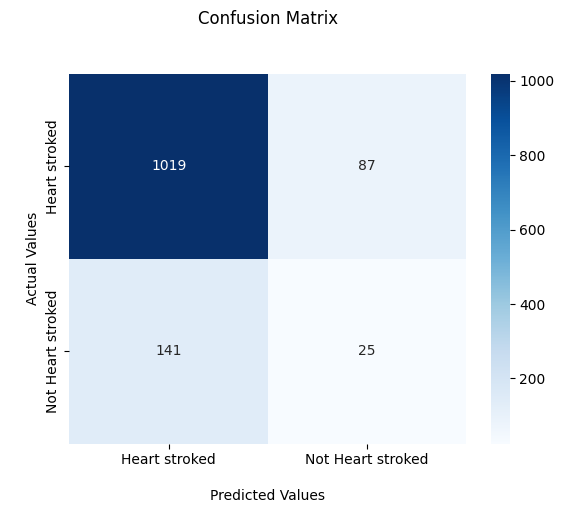

In [16]:
classifier_knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
classifier_knn.fit(X_train, Y_train)

Y_pred=classifier_knn.predict(X_test)
cm_knn=confusion_matrix(Y_test,Y_pred)
print(cm_knn)
print(accuracy_score(Y_test,Y_pred))

#visualising confusion matrix
ax=sns.heatmap(cm_knn,annot=True,cmap='Blues',fmt='d')
ax.set_title('Confusion Matrix'+'\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values' );
ax.xaxis.set_ticklabels(['Heart stroked','Not Heart stroked'])
ax.yaxis.set_ticklabels(['Heart stroked','Not Heart stroked'])
plt.show()


## Naïve bayes 

[[1028   78]
 [ 136   30]]
0.8317610062893082


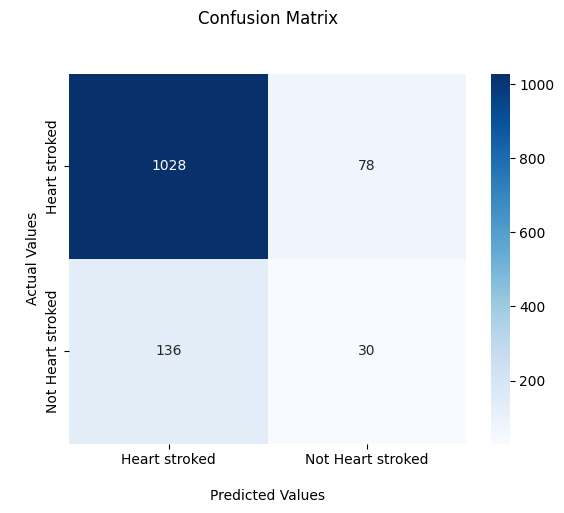

In [17]:
classifier_nb=GaussianNB()
classifier_nb.fit(X_train,Y_train)
Y_pred=classifier_nb.predict(X_test)
cm_naive=confusion_matrix(Y_test,Y_pred)
print(cm_naive)
print(accuracy_score(Y_test,Y_pred))
ax=sns.heatmap(cm_naive,annot=True,cmap='Blues',fmt='d')
ax.set_title('Confusion Matrix'+'\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values' );
ax.xaxis.set_ticklabels(['Heart stroked','Not Heart stroked'])
ax.yaxis.set_ticklabels(['Heart stroked','Not Heart stroked'])
plt.show()

## Actual vs. Predicted (knn)

In [23]:
Y_predict = classifier_knn.predict(X_test)  
df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': Y_predict
})

df_head = df.head()

styled_df = df_head.style.applymap(
    lambda x: 'background-color: lightblue; color: black', subset=['Actual', 'Predicted'])

styled_df


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_8020\1312182551.py:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df_head.style.applymap(


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


## Actual vs. Predicted (Naive Bayes)

In [24]:
Y_predict = classifier_nb.predict(X_test)  
df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': Y_predict
})
df_head = df.head()

styled_df = df_head.style.applymap(
    lambda x: 'background-color: lightblue; color: black', subset=['Actual', 'Predicted'])

styled_df

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_8020\3078623572.py:8: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df_head.style.applymap(


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0


## Predicting New Value

In [25]:
def predict_heart_disease(new_data, classifier, imputer_numeric, imputer_boolean,
                           imputer_categorical, ct, sc, le):
  
    new_data_array = np.array(new_data, dtype=object).reshape(1, -1)

    numeric_columns = [1, 4, 9, 10, 11, 12, 13, 14]
    boolean_columns = [3, 5, 7, 8]
    categorical_columns = [0, 2, 6]

    new_data_array[:, numeric_columns] = imputer_numeric.transform(new_data_array[:, numeric_columns])
    new_data_array[:, boolean_columns] = imputer_boolean.transform(new_data_array[:, boolean_columns])
    new_data_array[:, categorical_columns] = imputer_categorical.transform(new_data_array[:, categorical_columns])

    new_data_encoded = ct.transform(new_data_array)

    new_data_encoded[:, 9:] = sc.transform(new_data_encoded[:, 9:])

    prediction = classifier_nb.predict(new_data_encoded)

  
    predicted_class = le.inverse_transform(prediction)[0]

  
    print(f"Predicted: {predicted_class}")
   
#new_data = ['Male', 39, 'postgraduate', 0, 0, 0, 'no', 0, 0, 195, 106, 70, 26.97, 80, 77]
new_data = ['Male', 55, 'uneducated', 1, 10, 1, 'yes', 1, 1, 180, 120, 85, 28.5, 75, 70]

predict_heart_disease(new_data, classifier_nb, imputer_numeric, imputer_boolean, 
                      imputer_categorical, ct, sc, le)


Predicted: yes


## Visualization

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_8020\1273257386.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


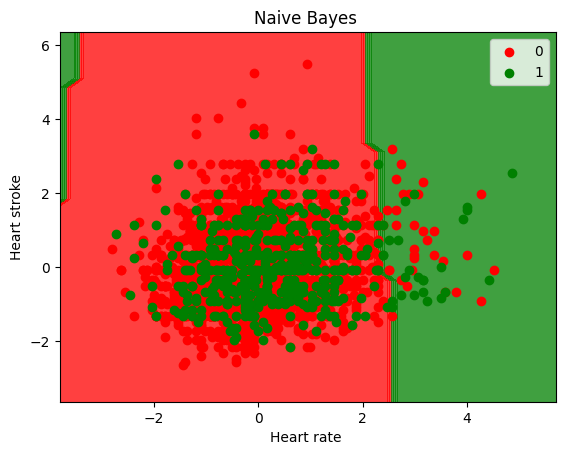

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_8020\1273257386.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


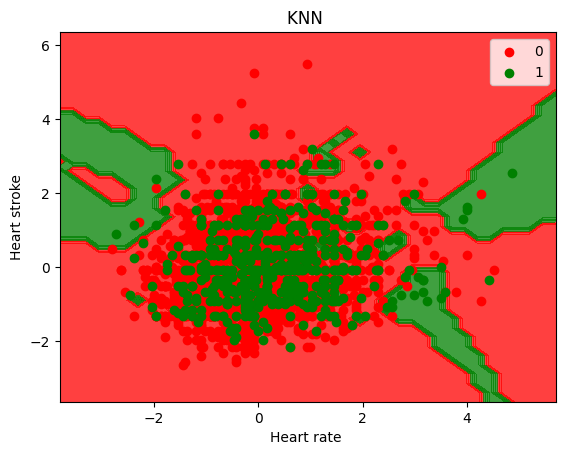

In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn_classifier.fit(X_train[:, [13, 15]], Y_train) 

nb_classifier = GaussianNB()
nb_classifier.fit(X_train[:, [13, 15]], Y_train)  


def scatter_plot(X, y, classifier, title):
    X_set = X  
    y_set = y  
   
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
    )
    
    plt.contourf(
        X1, X2, 
        classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75, cmap=ListedColormap(('red', 'green'))
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0], X_set[y_set == j, 1],
            c=ListedColormap(['red', 'green'])(i), label=j
        )
    plt.title(title)
    plt.xlabel('Heart rate ')
    plt.ylabel('Heart stroke')
    plt.legend()
    plt.show()
scatter_plot(X_train[:, [13, 15]], Y_train, nb_classifier, title='Naive Bayes ')    
scatter_plot(X_train[:, [13, 15]], Y_train, knn_classifier, title='KNN ')

